In [1]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import matplotlib.pyplot as plt
def dmdtim(mjd,mag,ldmints,ldtints):
    dmdt=np.zeros(shape=(ldmints,ldtints))
    maxval = 255
    maxpts = len(mjd)*(len(mjd)-1)/2
    dmjd = []
    dmag = []

    for i in range(len(mjd)):
        for j in range(i+1,len(mjd)):
            dmjd.append(mjd[j]-mjd[i])
            dmag.append(mag[j]-mag[i])

    (sdmjd,sdmag) = zip(*sorted(zip(dmjd,dmag)))

    minmjdbin = 0
    for i in range(len(sdmjd)):
        mjdbin = minmjdbin
        for k in range(minmjdbin,ldtints):
            if sdmjd[i] > dtints[k]:
                mjdbin = k
        minmjdbin = mjdbin
        magbin = 0
        for k in range(ldmints):
            if sdmag[i] > dmints[k]:
                magbin = k
        dmdt[magbin,mjdbin] += 1

    return (maxval*dmdt/maxpts), dmjd, dmag

In [29]:
# dmints = [-0.01, -0.006, -0.005, -0.004, -0.0012, -0.001, -0.001, -0.0007, -0.0006, -0.0005, -0.0004, -0.0003, 
#           -0.0002, -0.00015, -0.0001, -0.00005, 0, 0.00005, 0.0001, 0.0002, 0.0003, 0.001, 0.0012, 0.003, 0.004, 
#           0.005, 0.006, 0.01]
# dtints = [1.0/145, 20.0/145, 30.0/145, 50.0/145, 60.0/145, 80.0/145, 90.0/145, 
#           100.0/145, 120.0/145, 135.0/145, 140.0/145, 1.0, 1.05, 1.1, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5,
#           1.7, 1.75, 2,2.25, 2.3, 2.5,3.0]
# dmints = [-0.01, -0.006, -0.005, -0.004, -0.0012, -0.001, -0.001, -0.0007, -0.0006, -0.0005, -0.0004, -0.0003, 
#           -0.0002, -0.00015, -0.0001, -0.00005, 0, 0.00005, 0.0001, 0.0002, 0.0003, 0.001, 0.0012, 0.003, 0.004, 
#           0.005, 0.006, 0.01]
# dtints = [1.0/145, 20.0/145, 30.0/145, 50.0/145, 60.0/145, 80.0/145, 90.0/145, 
#           100.0/145, 120.0/145, 135.0/145, 140.0/145, 0.2, 0.5, 0.9, 1.0, 2.0, 3.0, 
#           4.0, 5.0, 8.0,10.0, 12.0, 13.5, 15.0, 17.0, 17.5, 19.0,23.0]
# dmints = [-0.01, -0.006, -0.005, -0.004, -0.0012, -0.001, -0.001, -0.0007, -0.0006, -0.0005, -0.0004, -0.0003, 
#           -0.0002, -0.00015, -0.0001, -0.00005, 0, 0.00005, 0.0001, 0.0002, 0.0003, 0.001, 0.0012, 0.003, 0.004, 
#           0.005, 0.006, 0.01]
# dtints = [1.0/145, 140.0/145, 0.2, 0.5, 0.9, 1.0, 2.0, 3.0, 
#           4.0, 5.0, 8.0,10.0, 12.0, 13.5, 15.0, 17.0, 17.5, 19.0, 
#           19.1, 19.2, 20.0, 21.0, 22.0, 22.5, 22.7, 23.0, 28.0, 33.0]
dmints = [-0.01, -0.006, -0.005, -0.004, -0.0012, -0.001, -0.001, -0.0007, -0.0006, -0.0005, -0.0004, -0.0003, 
          -0.0002, -0.00015, -0.0001, -0.00005, 0, 0.00005, 0.0001, 0.0002, 0.0003, 0.001, 0.0012, 0.003, 0.004, 
          0.005, 0.006, 0.01]
dtints = [1.0/145, 140.0/145, 0.2, 0.5, 0.9, 1.0, 2.0, 3.0, 
          4.0, 5.0, 8.0,10.0, 12.0, 13.5, 15.0, 17.0, 17.5, 19.0, 
          19.1, 19.2, 20.0, 21.0, 22.0, 22.5, 22.7, 23.0, 28.0, 33.0]
len(dtints)

28

In [30]:
raw_data = np.load("KeplerSampleFullQ.npy")
raw_data.shape

(2500, 3)

In [31]:
normalized_x = []
normalized_y = []
for i, _ in enumerate(raw_data):
    if len(raw_data[i][1]) == 3534:
        normalized_x.append(raw_data[i][0])
        normalized_y.append(raw_data[i][1])
    
normalized_x = np.array(normalized_x)
normalized_y = np.array(normalized_y)

In [32]:
first_x_points = normalized_x[:, :1000]
first_y_points = normalized_y[:, :1000]
test = dmdtim(first_x_points[0], first_y_points[0], 28, 28)

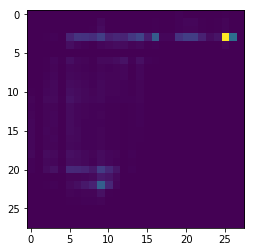

In [33]:
x,y,z = test
plt.imshow(x)
plt.show()

In [16]:
normalized_x[0].shape

(3534,)